In [1]:
import torchvision
torchvision.__version__

'0.5.0'

In [2]:
import os
import pandas as pd
import matplotlib.pylab as plt
import torch
%matplotlib inline

In [3]:
def scale_label(a, b):
    div = [ai / bi for ai, bi in zip(a, b)]
    return div

def rescale_label(a, b):
    div = [ai * bi for ai, bi in zip(a, b)]
    return div

In [4]:
import torchvision.transforms.functional as TF

def resize_img_label(image, label = (0.0, 0.0), target_size = (512, 512)):
    w_orig, h_orig = image.size
    w_target, h_target = target_size
    cx, cy = label
    
    # Resize image and label
    image_new = TF.resize(image, target_size)
    label_new = cx / w_orig * w_target, cy / h_orig * h_target
    
    return image_new, label_new

In [5]:
def transformer(image, label, params):
    image, label = resize_img_label(image, label, params["target_size"])
    
    if params["scale_label"]:
        label = scale_label(label, params["target_size"])
    
    image = TF.to_tensor(image)
    return image, label

In [6]:
from torch.utils.data import Dataset
from PIL import Image

In [7]:
class PlectrumDataset(Dataset):
    def __init(self, data_path, transform, trans_params):
        pass
    
    def __len__(self):
        # Return size of data set
        return len(self.labels)
    
    def __getitem__(self, idx):
        pass

In [8]:
def __init__(self, data_path, transform, trans_params):
    
    # Full path of the labels file
    labels_path = os.path.join(data_path, "pick_locations.csv")
    
    # Read labels as a data frame
    labels_dataframe = pd.read_csv(labels_path, index_col = "id")
    
    # Extract labels
    self.labels = labels_dataframe[["pick_x", "pick_y"]].values
    
    # Extract id and image_name columns
    self.image_name = labels_dataframe["img_name"]
    self.ids = labels_dataframe.index
    
    self.image_path = [0] * len(self.ids)
    for id_ in self.ids:
        self.image_path[id_ - 1] = os.path.join(data_path, self.image_name[id_])
    
    self.transform = transform
    self.trans_params = trans_params
    

In [9]:
def __getitem__(self, idx):
    # Load PIL image
    image = Image.open(self.image_path[idx])
    label = self.labels[idx]
    
    # Transform to tensor
    image, label = self.transform(image, label, self.trans_params)
    
    return image, label

In [10]:
PlectrumDataset.__init__ = __init__
PlectrumDataset.__getitem__ = __getitem__

In [11]:
data_path = "./data/train/" # Change this to separate ./data/test/ which contains images that aren't in val or train
trans_params_test = {
    "target_size": (512, 512),
    "p_hflip": 0.0,
    "p_vflip": 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,
}

test_dataset = PlectrumDataset(data_path, transformer, trans_params_test)

In [12]:
from torch.utils.data import DataLoader
val_dl = DataLoader(test_dataset, batch_size = 16, shuffle = False)

In [13]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
class NeuralNet(nn.Module):
    def __init__(self, params):
        super(NeuralNet, self).__init__()
    
    def forward(self, x):
        return x

In [15]:
def __init__(self, params):
    super(NeuralNet, self).__init__()
    
    C_in, H_in, W_in = params["input_shape"]
    init_f = params["initial_filters"]
    num_outputs = params["num_outputs"]
    
    self.conv1 = nn.Conv2d(C_in, init_f, kernel_size = 3, stride = 2, padding = 1)
    self.conv2 = nn.Conv2d(init_f + C_in, 2 * init_f, kernel_size = 3, stride = 1, padding = 1)
    self.conv3 = nn.Conv2d(3 * init_f + C_in, 4 * init_f, kernel_size = 3, padding = 1)
    self.conv4 = nn.Conv2d(7 * init_f + C_in, 8 * init_f, kernel_size = 3, padding = 1)
    self.conv5 = nn.Conv2d(15 * init_f + C_in, 16 * init_f, kernel_size = 3, padding = 1)
    self.fc1 = nn.Linear(16 * init_f, num_outputs) 

In [16]:
def forward(self, x):
    identity = F.avg_pool2d(x, 4, 4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim = 1)
    
    identity = F.avg_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim = 1)
    
    identity = F.avg_pool2d(x, 2, 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim = 1)
    
    identity = F.avg_pool2d(x, 2, 2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim = 1)
    
    x = F.relu(self.conv5(x))
    
    x = F.adaptive_avg_pool2d(x, 1)
    x = x.reshape(x.size(0), -1)
    
    x = self.fc1(x)
    return x
    
    

In [17]:
NeuralNet.__init__ = __init__
NeuralNet.forward = forward

In [18]:
params_model = {
    "input_shape": (3, 512, 512),
    "initial_filters": 16,
    "num_outputs": 2,
}

# Create model
model = NeuralNet(params_model)
model.eval()

NeuralNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)

In [19]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA device: " + torch.cuda.get_device_name())
    model = model.to(device)

CUDA device: GeForce GTX 1070


In [20]:
weights_path = "./models/weights.pt"
model.load_state_dict(torch.load(weights_path))

<All keys matched successfully>

In [21]:
# Define device as a global variable

In [22]:
device = torch.device("cuda")

def loss_epoch(model, loss_func, dataset_dataloader, func_test_cycle = False, optimiser = None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dataloader.dataset)
    
    for xb, yb in dataset_dataloader:
        # Convert to tensor
        yb = torch.stack(yb, 1)
        yb = yb.type(torch.float32).to(device)
        
        # Get model output
        output = model(xb.to(device))
        
        # Get loss per batch
        loss_b, metric_b = loss_batch(loss_func, output, yb, optimiser)
        
        # Update running loss
        running_loss += loss_b
        
        # Update running metric
        if metric_b is not None:
            running_metric += metric_b
        
        # Break the loop for sanity check
        if func_test_cycle is True:
            break
    
    # Average loss value
    loss = running_loss / float(len_data)
    
    # Average metric value
    metric = running_metric / float(len_data)
    
    return loss, metric

In [23]:
def cxcy_to_boundingbox(cxcy, w = 50.0 / 512, h = 50.0 / 512):
    # Define two new tensors for w and h
    w_tensor = torch.ones(cxcy.shape[0], 1, device = cxcy.device) * w
    h_tensor = torch.ones(cxcy.shape[0], 1, device = cxcy.device) * h
    
    # Extract cx and cy
    cx = cxcy[:, 0].unsqueeze(1)
    cy = cxcy[:, 1].unsqueeze(1)
    
    # Concat cx, cy, w and h
    boxes = torch.cat((cx.float(), cy.float(), w_tensor, h_tensor), -1) # cx, cy, w, h
    
    return torch.cat((boxes[:, :2] - boxes[:, 2:] / 2, # xmin, ymin
                     boxes[:, :2] + boxes[:, 2:] / 2), 1) # xmax, ymax

In [24]:
def metrics_batch(output, target):
    output = cxcy_to_boundingbox(output)
    target = cxcy_to_boundingbox(target)
    
    iou = torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [25]:
def loss_batch(loss_func, output, target, optimiser = None):
    # Get loss
    loss = loss_func(output, target)
    
    # Get performance metric
    metric_b = metrics_batch(output, target)
    
    if optimiser is not None:
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    
    return loss.item(), metric_b

In [26]:
loss_func = nn.SmoothL1Loss(reduction = "sum")

with torch.no_grad():
    loss, metric = loss_epoch(model, loss_func, val_dl)
print(loss, metric)

0.033982360653117695 0.0153410502263533


In [27]:
from PIL import ImageDraw
import numpy as np
import torchvision.transforms.functional as tv_F
np.random.seed(0)

import matplotlib.pylab as plt
%matplotlib inline

In [28]:
def show_tensor_to_labels(img, label1, label2, w_h = (50, 50)):
    label1 = rescale_label(label1, img.shape[1:])
    label2 = rescale_label(label2, img.shape[1:])
    img = tv_F.to_pil_image(img)
    
    w, h = w_h
    cx, cy = label1
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx - w / 2, cy - h / 2), (cx + w / 2, cy + h / 2)), outline = "green", width = 2)
    
    cx, cy = label2
    draw.rectangle(((cx - w / 2, cy - h / 2), (cx + w / 2, cy + h / 2)), outline = "blue", width = 2)
    
    plt.imshow(np.asarray(img))

In [29]:
# Get random samples
rndInds = np.random.randint(len(test_dataset), size = 15)
print(rndInds)

[559 629 192 359   9 277 599  70 472 600 396 314 486 551  87]


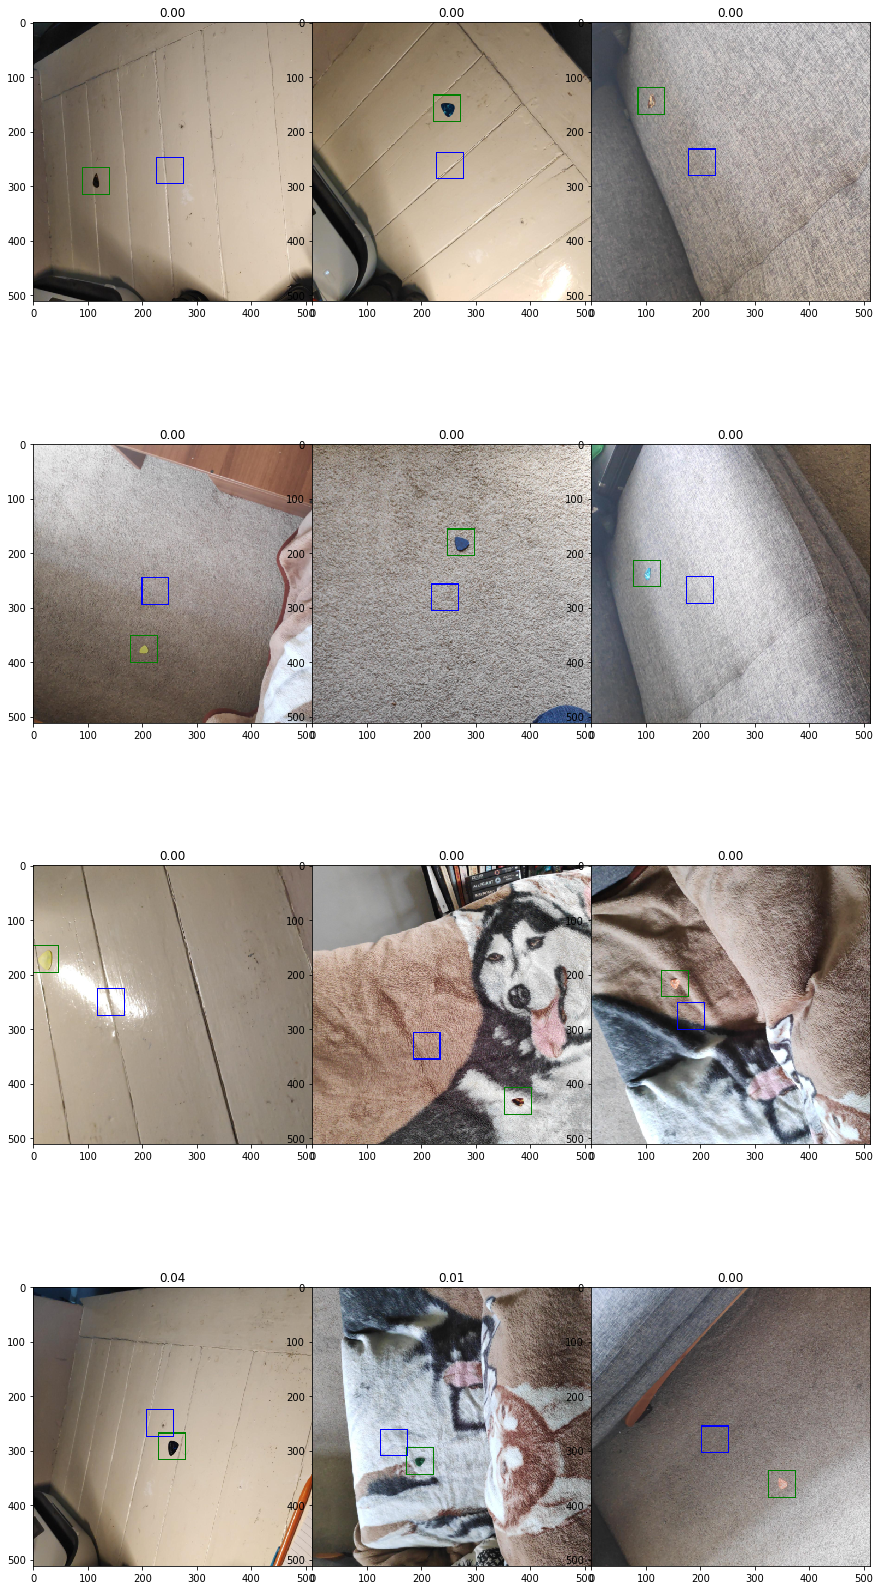

In [33]:
plt.rcParams['figure.figsize'] = (15, 30)
plt.subplots_adjust(wspace = 0.0, hspace = 0.15)

for i, rndi in enumerate(rndInds):
    img, label = test_dataset[rndi]
    h, w = img.shape[1:]
    with torch.no_grad():
        label_pred = model(img.unsqueeze(0).to(device))[0].cpu()
    
    plt.subplot(4, 3, i + 1)
    show_tensor_to_labels(img, label, label_pred)
    
    # Calculate IOU
    label_bb = cxcy_to_boundingbox(torch.tensor(label).unsqueeze(0))
    label_pred_bb = cxcy_to_boundingbox(label_pred.unsqueeze(0))
    iou = torchvision.ops.box_iou(label_bb, label_pred_bb)
    plt.title("%.2f" % iou.item())
    
    if i > 10:
        break